In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [13]:
# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names) # Convert to DataFrame
y = pd.Series(iris.target, name='target')

# Combine features and target into one DataFrame
iris_df = pd.concat([X, y], axis=1)

# Display the first 10 rows
print(" Iris Dataset Preview:")
print(iris_df.head(10))

 Iris Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  

In [3]:
# Use only 2 features for simplicity in visualization
X = X[['sepal length (cm)', 'petal length (cm)']]

In [4]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Perform hierarchical clustering (ward linkage)
linkage_matrix = linkage(X_scaled, method='ward')

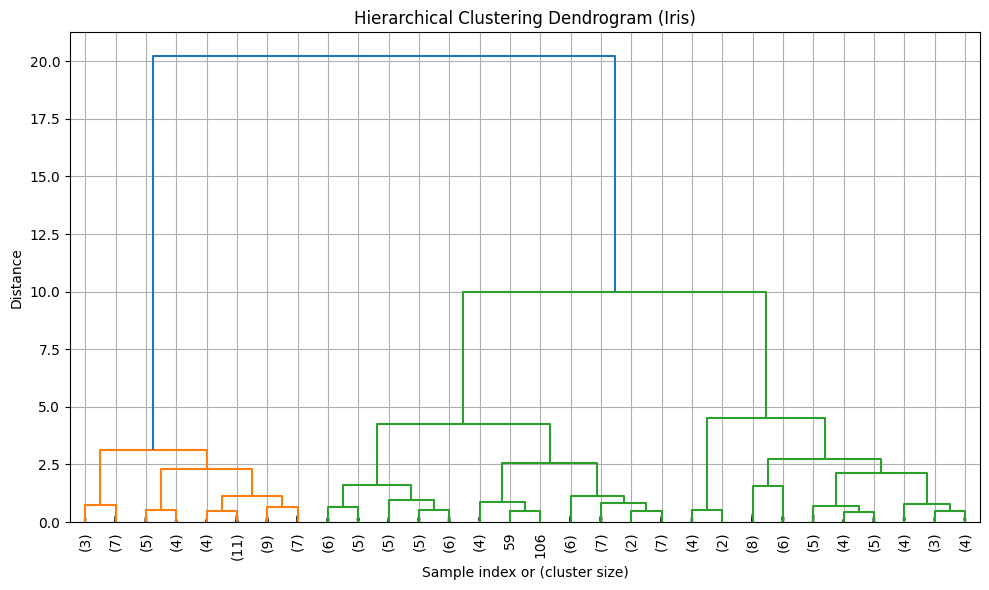

In [6]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix,
           truncate_mode='lastp',  # show only the last p merges
           p=30,                   # or set to None for full tree
           leaf_rotation=90.,
           leaf_font_size=10.,
           show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram (Iris)")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Cut the dendrogram to get cluster labels
from scipy.cluster.hierarchy import fcluster
cluster_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')  # 3 clusters


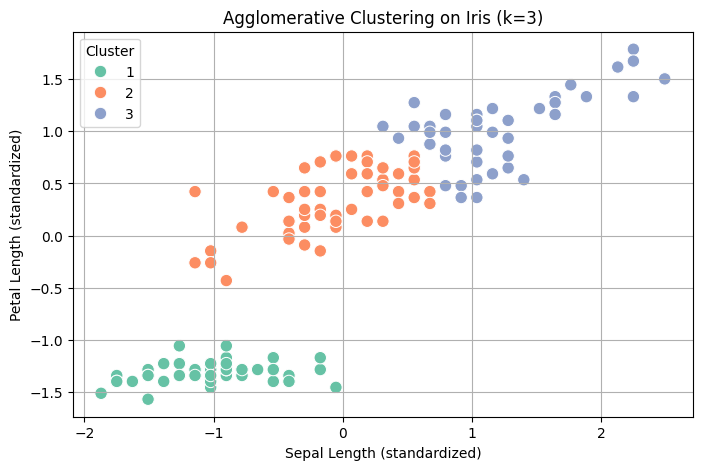

In [10]:
# Visualize clusters
X_plot = pd.DataFrame(X_scaled, columns=['sepal length', 'petal length'])
X_plot['Cluster'] = cluster_labels

plt.figure(figsize=(8, 5))
sns.scatterplot(data=X_plot, x='sepal length', y='petal length', hue='Cluster', palette='Set2', s=80)
plt.title("Agglomerative Clustering on Iris (k=3)")
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Petal Length (standardized)")
plt.grid(True)
plt.show()